# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator
from matplotlib import cm

from edp import difusao_2d
from sistemas_aleatorios import rwalk, coeficiente_D, rwalk_2d, cafe_com_creme, entropia, dla, massa_cluster
from matrizes import mprint

tamanho_mark = 1
tamanho_plot = (10, 10)

%matplotlib widget


https://mathworld.wolfram.com/RandomWalk1-Dimensional.html

# Exercício 1

In [2]:
m_1 = 100000
n_1 = 100
x_1, x2ave_1 = rwalk(m=m_1, n=n_1)


In [3]:
D_1 = coeficiente_D(x2ave_1)
print(D_1)


0.49982+/-0.00022


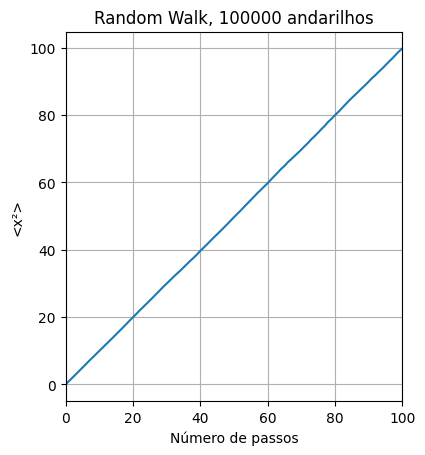

In [4]:
fig_1, ax_1 = plt.subplots()
ax_1.set_title('Random Walk, ' + str(m_1) + ' andarilhos')
ax_1.set_xlabel('Número de passos')
ax_1.set_ylabel('<x²>')
ax_1.set_aspect('equal')
ax_1.grid()
ax_1.set_xlim(0, n_1)
ax_1.plot(x2ave_1)


# Exercício 2

In [5]:
m_2 = 100000
n_2 = 100
p_2 = 0.25
x_2, x2ave_2 = rwalk(p_esq=p_2, m=m_2, n=n_2)


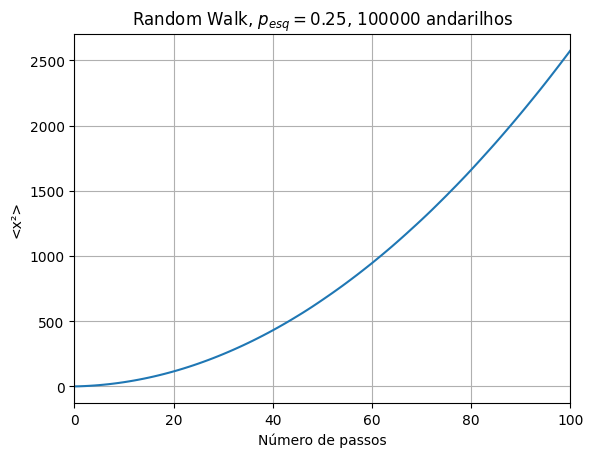

In [6]:
fig_2, ax_2 = plt.subplots()
ax_2.set_title('Random Walk, ' +
               '$p_{esq} = 0.25$, ' + str(m_2) + ' andarilhos')
ax_2.set_xlabel('Número de passos')
ax_2.set_ylabel('<x²>')
# ax_2.set_aspect('equal')
ax_2.grid()
ax_2.set_xlim(0, n_2)
ax_2.plot(x2ave_2)


# Exercício 3

In [7]:
posicoes = cafe_com_creme(m=1000, t=20000)
S_4 = entropia(posicoes)


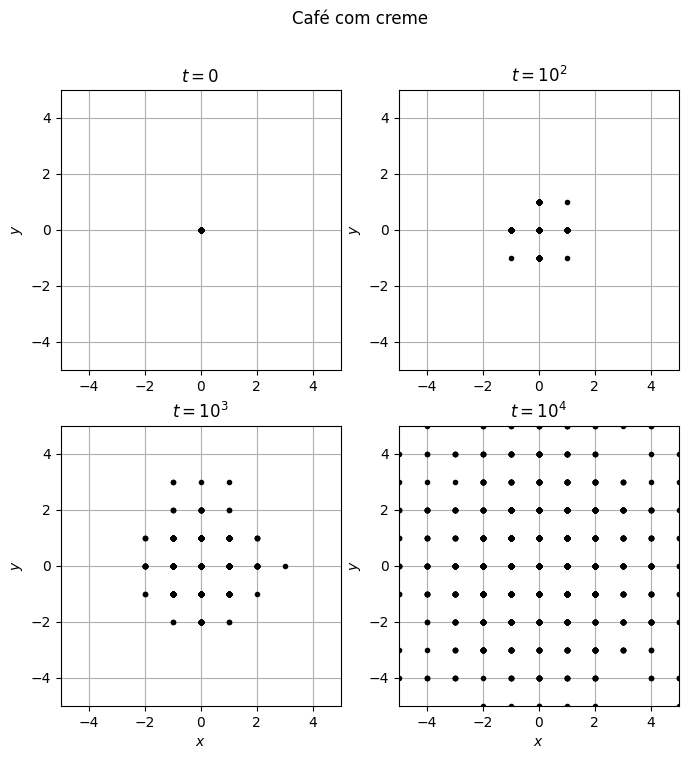

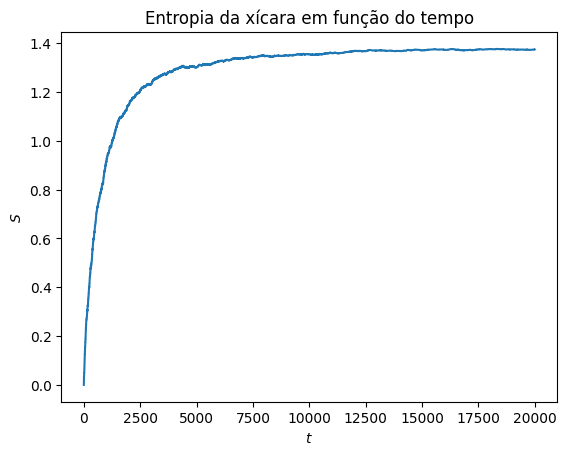

In [8]:
fig_3a, axs_3a = plt.subplots(2, 2)
fig_3a.suptitle('Café com creme')
fig_3a.set_size_inches(8, 8)

axs_3a[0, 0].set_title('$t = 0$')
# axs_3a[0, 0].set_xlabel('$x$')
axs_3a[0, 0].set_ylabel('$y$')
axs_3a[0, 0].set_xlim(-5, 5)
axs_3a[0, 0].set_ylim(-5, 5)
axs_3a[0, 0].set_aspect('equal')
axs_3a[0, 0].grid()

axs_3a[0, 1].set_title('$t = 10^2$')
# axs_3a[0, 1].set_xlabel('$x$')
axs_3a[0, 1].set_ylabel('$y$')
axs_3a[0, 1].set_xlim(-5, 5)
axs_3a[0, 1].set_ylim(-5, 5)
axs_3a[0, 1].set_aspect('equal')
axs_3a[0, 1].grid()

axs_3a[1, 0].set_title('$t = 10^3$')
axs_3a[1, 0].set_xlabel('$x$')
axs_3a[1, 0].set_ylabel('$y$')
axs_3a[1, 0].set_xlim(-5, 5)
axs_3a[1, 0].set_ylim(-5, 5)
axs_3a[1, 0].set_aspect('equal')
axs_3a[1, 0].grid()

axs_3a[1, 1].set_title('$t = 10^4$')
axs_3a[1, 1].set_xlabel('$x$')
axs_3a[1, 1].set_ylabel('$y$')
axs_3a[1, 1].set_xlim(-5, 5)
axs_3a[1, 1].set_ylim(-5, 5)
axs_3a[1, 1].set_aspect('equal')
axs_3a[1, 1].grid()

for particula in range(np.shape(posicoes)[0]):
    axs_3a[0, 0].plot(posicoes[particula, 0, 0], posicoes[particula, 0, 1], '.', color='black')
    axs_3a[0, 1].plot(posicoes[particula, 100, 0], posicoes[particula, 100, 1], '.', color='black')
    axs_3a[1, 0].plot(posicoes[particula, 1000, 0], posicoes[particula, 1000, 1], '.', color='black')
    axs_3a[1, 1].plot(posicoes[particula, 10000, 0], posicoes[particula, 10000, 1], '.', color='black')

fig_3b, ax_3b = plt.subplots()
ax_3b.set_title('Entropia da xícara em função do tempo')
ax_3b.set_xlabel('$t$')
ax_3b.set_ylabel('$S$')
ax_3b.plot(S_4)



# Exercício 4

In [45]:
dim_4 = np.array([15, 15])
meio_4 = dim_4 // 2
L_4 = 1.0
D_4 = 1.0
dx_4 = 0.01
dt_4a = (dx_4)**2 / (4 * D_4)
t_f_4 = 10.0

X_4 = np.linspace(-L_4 / 2, L_4 / 2, dim_4[0])
Y_4 = np.linspace(-L_4 / 2, L_4 / 2, dim_4[1])
Xm_4, Ym_4 = np.meshgrid(X_4, Y_4)
Xm_4 = Xm_4.transpose()
Ym_4 = Ym_4.transpose()


## 4. a)

In [46]:
rho_0_4a = np.zeros(dim_4)
rho_0_4a[meio_4[0] - 2:meio_4[0] + 2 + 1, meio_4[1] - 2:meio_4[1] + 2 + 1] = 1.0

# mprint(rho_0_4a)

In [47]:
rho_4a = difusao_2d(
    rho_0=rho_0_4a,
    t_f=t_f_4,
    dx=dx_4,
    D=D_4
)

Difusão:   0%|          | 0/399999 [00:00<?, ?it/s]

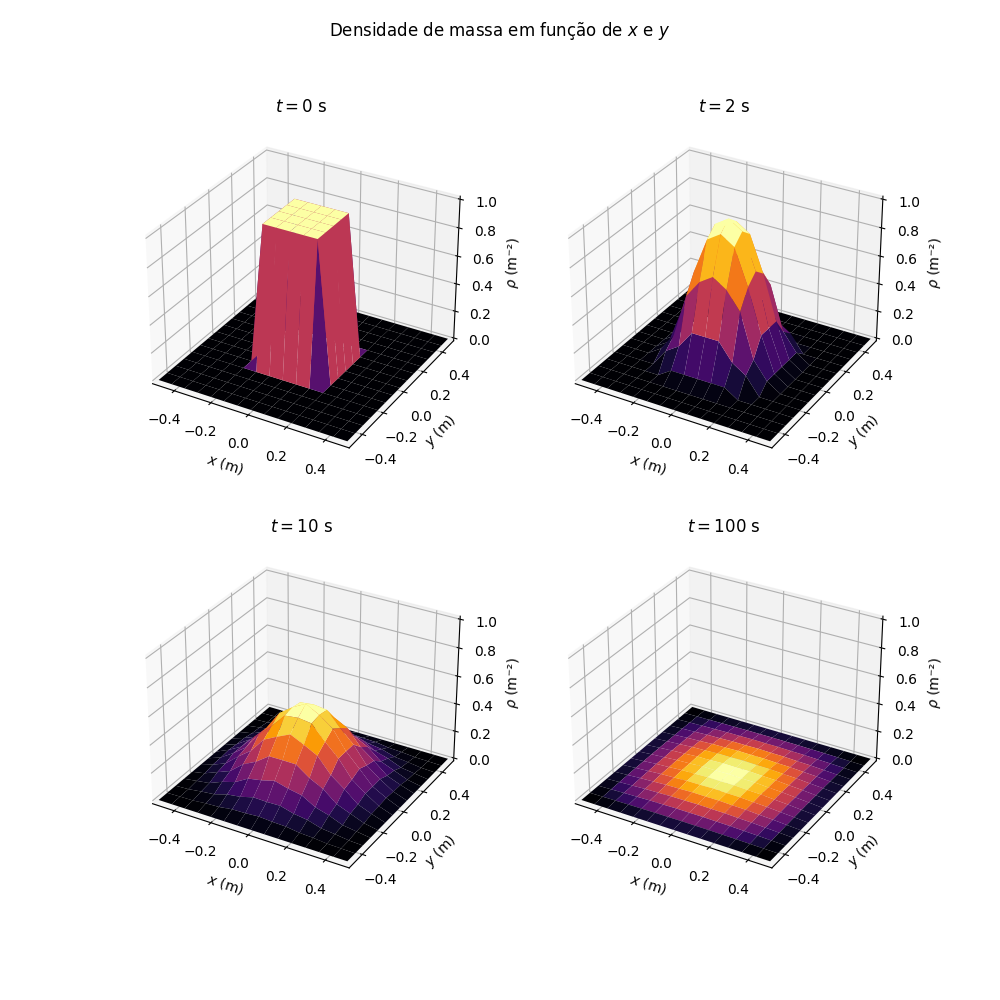

In [103]:
fig_4a, axes_4a = plt.subplots(nrows=2, ncols=2, subplot_kw={"projection": "3d"})
fig_4a.suptitle('Densidade de massa em função de $x$ e $y$')
fig_4a.set_size_inches(tamanho_plot)

tempos = np.array([0, 2, 10, 100], dtype=int)
i = 0
for ax in axes_4a.flat:
    tempo = tempos[i]
    ax.set_title('$t = $' + str(tempo) + ' s')
    ax.set_xlabel('$x$ (m)')
    ax.set_ylabel('$y$ (m)')
    ax.set_zlabel('$\\rho$ (m⁻²)')
    ax.set_xlim(- L_4 / 2, L_4 / 2)
    ax.set_ylim(- L_4 / 2, L_4 / 2)
    ax.set_zlim(0, 1)
    ax.plot_surface(Xm_4, Ym_4, rho_4a[:, :, tempo], cmap=cm.inferno)
    i += 1


## 4. b)

In [99]:
rho_0_4b = np.zeros(dim_4)
rho_0_4b[:, meio_4[1]] = 1.0

# mprint(rho_0_4b)


In [100]:
rho_4b = difusao_2d(
    rho_0=rho_0_4b,
    t_f=t_f_4,
    dx=dx_4,
    D=D_4
)

Difusão:   0%|          | 0/399999 [00:00<?, ?it/s]

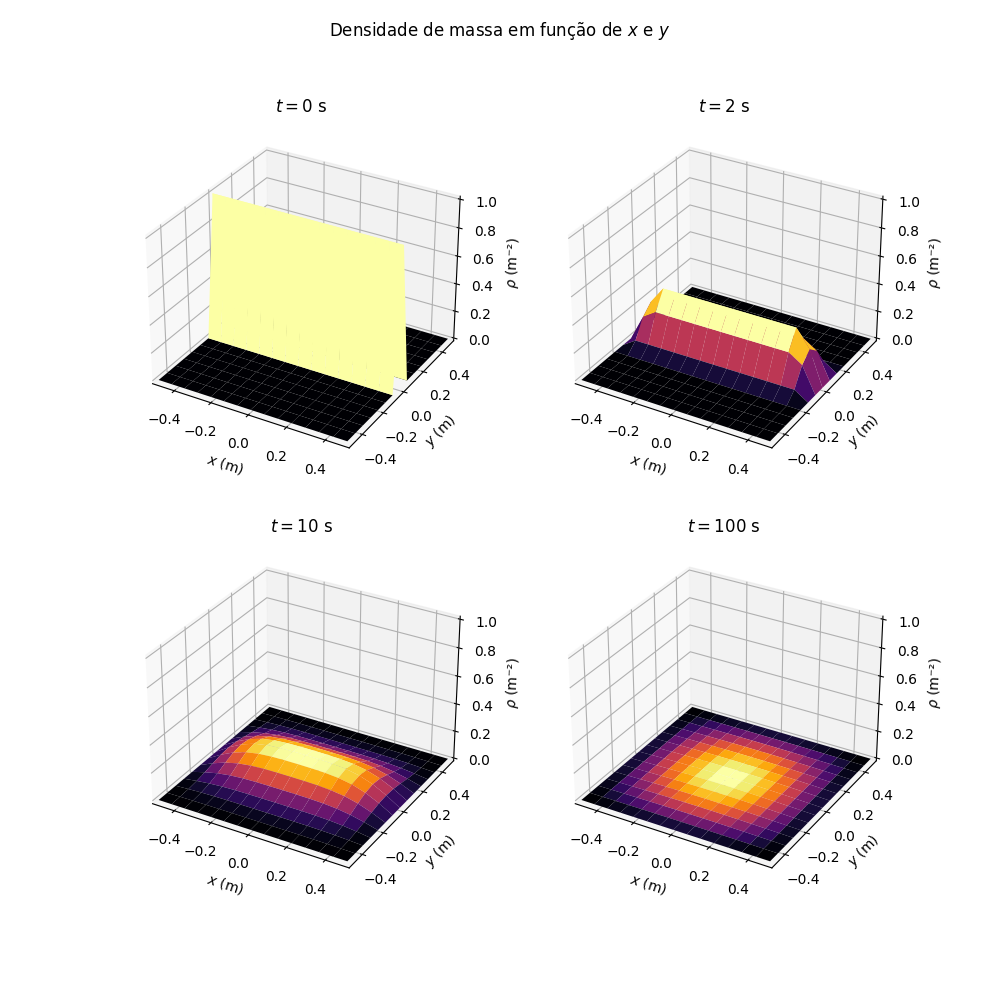

In [102]:
fig_4b, axes_4b = plt.subplots(nrows=2, ncols=2, subplot_kw={"projection": "3d"})
fig_4b.suptitle('Densidade de massa em função de $x$ e $y$')
fig_4b.set_size_inches(tamanho_plot)

tempos = np.array([0, 2, 10, 100], dtype=int)
i = 0
for ax in axes_4b.flat:
    tempo = tempos[i]
    ax.set_title('$t = $' + str(tempo) + ' s')
    ax.set_xlabel('$x$ (m)')
    ax.set_ylabel('$y$ (m)')
    ax.set_zlabel('$\\rho$ (m⁻²)')
    ax.set_xlim(- L_4 / 2, L_4 / 2)
    ax.set_ylim(- L_4 / 2, L_4 / 2)
    ax.set_zlim(0, 1)
    ax.plot_surface(Xm_4, Ym_4, rho_4b[:, :, tempo], cmap=cm.inferno)
    i += 1


## 4. c)

In [112]:
rho_0_4c = np.cos( np.pi / 2 * Xm_4 / 0.5) * np.cos( np.pi / 2 * Ym_4 / 0.5)
# rho_0_4c[:, meio_4[1]] = 1.0

mprint(rho_0_4c)


0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
0.00  0.05  0.10  0.14  0.17  0.20  0.22  0.22  0.22  0.20  0.17  0.14  0.10  0.05  0.00
0.00  0.10  0.19  0.27  0.34  0.39  0.42  0.43  0.42  0.39  0.34  0.27  0.19  0.10  0.00
0.00  0.14  0.27  0.39  0.49  0.56  0.61  0.62  0.61  0.56  0.49  0.39  0.27  0.14  0.00
0.00  0.17  0.34  0.49  0.61  0.70  0.76  0.78  0.76  0.70  0.61  0.49  0.34  0.17  0.00
0.00  0.20  0.39  0.56  0.70  0.81  0.88  0.90  0.88  0.81  0.70  0.56  0.39  0.20  0.00
0.00  0.22  0.42  0.61  0.76  0.88  0.95  0.97  0.95  0.88  0.76  0.61  0.42  0.22  0.00
0.00  0.22  0.43  0.62  0.78  0.90  0.97  1.00  0.97  0.90  0.78  0.62  0.43  0.22  0.00
0.00  0.22  0.42  0.61  0.76  0.88  0.95  0.97  0.95  0.88  0.76  0.61  0.42  0.22  0.00
0.00  0.20  0.39  0.56  0.70  0.81  0.88  0.90  0.88  0.81  0.70  0.56  0.39  0.20  0.00
0.00  0.17  0.34  0.49  0.61  0.70  0.76  0.78  0.76  0.70  0.61  0.49  0.34  0.17  0.00
0.00  0.14  0.27  0.3

In [113]:
rho_4c = difusao_2d(
    rho_0=rho_0_4c,
    t_f=t_f_4,
    dx=dx_4,
    D=D_4
)

Difusão:   0%|          | 0/399999 [00:00<?, ?it/s]

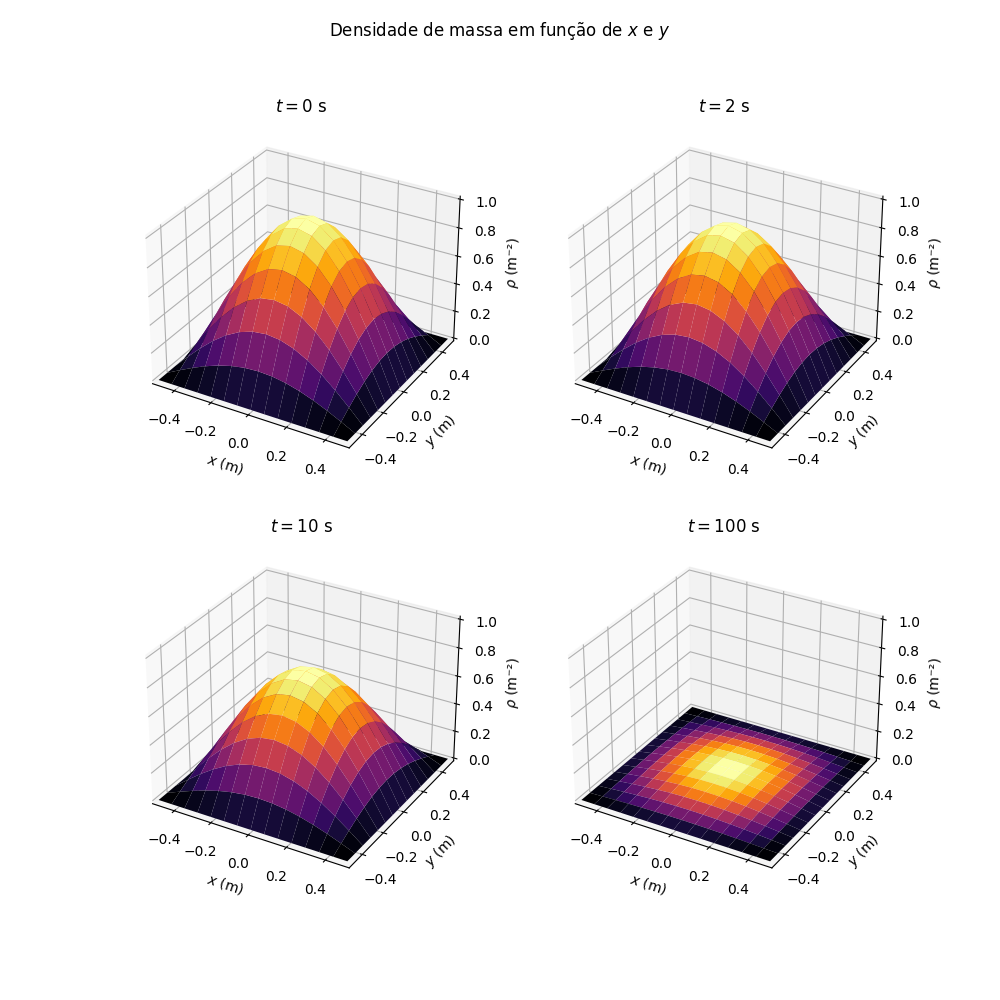

In [114]:
fig_4c, axes_4c = plt.subplots(nrows=2, ncols=2, subplot_kw={"projection": "3d"})
fig_4c.suptitle('Densidade de massa em função de $x$ e $y$')
fig_4c.set_size_inches(tamanho_plot)

tempos = np.array([0, 2, 10, 100], dtype=int)
i = 0
for ax in axes_4c.flat:
    tempo = tempos[i]
    ax.set_title('$t = $' + str(tempo) + ' s')
    ax.set_xlabel('$x$ (m)')
    ax.set_ylabel('$y$ (m)')
    ax.set_zlabel('$\\rho$ (m⁻²)')
    ax.set_xlim(- L_4 / 2, L_4 / 2)
    ax.set_ylim(- L_4 / 2, L_4 / 2)
    ax.set_zlim(0, 1)
    ax.plot_surface(Xm_4, Ym_4, rho_4c[:, :, tempo], cmap=cm.inferno)
    i += 1


# Exercício 5

In [2]:
pos_ocup = dla(n_part=500)  # 30 part
massa = massa_cluster(pos_ocup=pos_ocup)


DLA cluster:   0%|          | 0/499 [00:00<?, ?it/s]

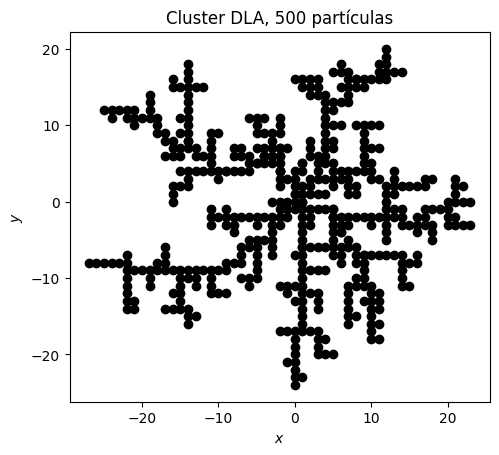

In [12]:
m, n = pos_ocup.shape

fig_5a, ax_5a = plt.subplots()

ax_5a.set_title('Cluster DLA, ' + str(m) + ' partículas')
ax_5a.set_xlabel('$x$')
ax_5a.set_ylabel('$y$')
ax_5a.set_aspect('equal')

ax_5a.plot(pos_ocup[0, 0], pos_ocup[0, 1], '.', color='red')
for i in np.arange(1, m):
    ax_5a.plot(pos_ocup[i, 0], pos_ocup[i, 1], 'o', color='black')

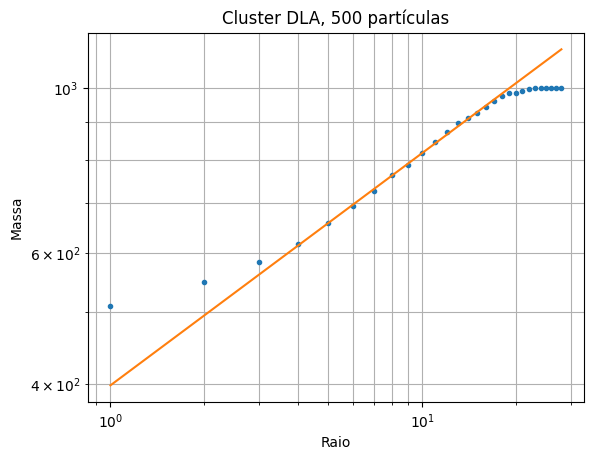

In [5]:
from scipy.optimize import curve_fit


def linear(x, a, b):
    return a * x + b


def dim_fractal(massa, i_inicial=0, i_final=-1, func=linear):
    x = np.log(massa[i_inicial:i_final, 0])
    y = np.log(massa[i_inicial:i_final, 1])

    popt, pcov = curve_fit(func, x, y)

    return popt


d_f, intercept = dim_fractal(massa, 5, -10)


fig_5b, ax_5b = plt.subplots()

ax_5b.set_title('Cluster DLA, ' + str(m) + ' partículas')
ax_5b.set_xlabel('Raio')
ax_5b.set_xscale("log")
ax_5b.set_ylabel('Massa')
ax_5b.set_yscale("log")
ax_5b.grid(visible=True, which='both')

ax_5b.plot(massa[:, 0], massa[:, 1], '.')

x_ajuste = np.linspace(massa[:, 0].min(), massa[:, 0].max())
y_ajuste = np.exp(d_f * np.log(x_ajuste) + intercept)
ax_5b.plot(x_ajuste, y_ajuste)


In [6]:
print(d_f)

0.3121643268564794


# Salvar imagens

In [22]:
# fig_1.savefig(fname='lista03/' + 'fig_1.pdf')

# fig_2.savefig(fname='lista03/' + 'fig_2.pdf')

# fig_3a.savefig(fname='lista03/' + 'fig_3a.pdf')
# fig_3b.savefig(fname='lista03/' + 'fig_3b.pdf')

fig_4a.savefig(fname='lista03/' + 'fig_4a.pdf')
fig_4b.savefig(fname='lista03/' + 'fig_4b.pdf')
fig_4b.savefig(fname='lista03/' + 'fig_4b.pdf')

# fig_5a.savefig(fname='lista03/' + 'fig_5a.pdf')
# fig_5b.savefig(fname='lista03/' + 'fig_5b.pdf')
